In [3]:
import torch

torch.cuda.is_available()

True

In [1]:
from SRGAN_model import RRDBNet

G = RRDBNet(in_nc=3, out_nc=3, nf=64, nb=32, gc=32)

G.parameters

ImportError: cannot import name 'RRDBNet' from 'SRGAN_model' (c:\SaiVinay\Thesis\Code\dev_03_02\SRGAN_model.py)

In [2]:
# load yml file
import yaml
with open("C:\SaiVinay\Thesis\Code\dev_03_02\opt.yml") as f:
    opt = yaml.load(f, Loader=yaml.FullLoader)


In [6]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from networks import define_D, define_G

netG = define_G(opt)
netD = define_D(opt)

In [7]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.lr_imgs = os.listdir(lr_dir)
        self.hr_imgs = os.listdir(hr_dir)
        self.transform = transform

    def __len__(self):
        return min(len(self.lr_imgs), len(self.hr_imgs))

    def __getitem__(self, idx):
        lr_img_name = os.path.join(self.lr_dir, self.lr_imgs[idx])
        hr_img_name = os.path.join(self.hr_dir, self.hr_imgs[idx])
        
        lr_img = Image.open(lr_img_name).convert("RGB")
        hr_img = Image.open(hr_img_name).convert("RGB")
        
        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)
        
        return lr_img, hr_img

def get_loader(lr_dir, hr_dir, batch_size, num_workers=4, shuffle=True):
    transform = transforms.Compose([
        transforms.ToTensor(),
        # You can add more transformations here such as normalization, resizing, etc.
    ])
    
    dataset = SRDataset(lr_dir, hr_dir, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
    
    return loader


torch.Size([32, 32, 3])


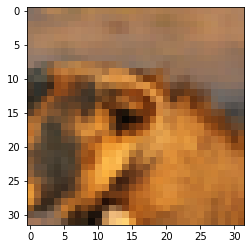

In [104]:
lr_img_name = r"C:\SaiVinay\Thesis\Code\DataSets\DF2K\valid\LR\0901.png"
lr_img = Image.open(lr_img_name).convert("RGB")
pre_process_lr = transforms.Compose([transforms.RandomCrop(32),
                                               transforms.ToTensor()])
lr_img = pre_process_lr(lr_img)
lr_img = lr_img.permute(1, 2, 0)
print(lr_img.shape)
plt.imshow(lr_img)
plt.show()

In [164]:
import os
import pandas as pd
from torchvision.io import read_image
import torchvision.transforms as transforms

class CustomImageDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, size=32, transform=None):
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.size = size
        self.lr_imgs = os.listdir(lr_dir)
        self.hr_imgs = os.listdir(hr_dir)
        self.pre_process_lr = transforms.Compose([transforms.CenterCrop(self.size),
                                               transforms.ToTensor()])
        self.pre_process_hr = transforms.Compose([transforms.CenterCrop(self.size*4),
                                               transforms.ToTensor()])
    
    def __len__(self):
            return min(len(self.lr_dir), len(self.hr_dir))

    def __getitem__(self, idx):
        if type(self.lr_dir) != None and type(self.hr_dir) != None:
            print(idx)
            print(self.lr_imgs[idx], self.hr_imgs[idx])
            lr_img_name = os.path.join(self.lr_dir, self.lr_imgs[idx])
            hr_img_name = os.path.join(self.hr_dir, self.hr_imgs[idx])
            lr_img = Image.open(lr_img_name).convert("RGB")
            hr_img = Image.open(hr_img_name).convert("RGB")
            if min(lr_img.size) >= self.size and min(hr_img.size) >= self.size*4:
                lr_image = self.pre_process_lr(lr_img)
                hr_image = self.pre_process_hr(hr_img)
                # show_lr_img = lr_image.permute(1, 2, 0)
                # show_hr_img = hr_image.permute(1, 2, 0)
                # fig, axis = plt.subplots(1,2)
                # axis[0].imshow(show_lr_img)
                # axis[0].set_label("LR Image")

                # axis[1].imshow(show_hr_img)
                # axis[1].set_label("HR Image")
                
                # plt.show()
                
                return hr_image, lr_image
        
lr_dir = r"C:\SaiVinay\Thesis\Code\DataSets\DF2K\valid\LR"
hr_dir = r"C:\SaiVinay\Thesis\Code\DataSets\DF2K\valid\HR"

dataset = CustomImageDataset(lr_dir, hr_dir)
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset, batch_size=8)

In [165]:
for batch_idx, (hr_img, lr_img) in enumerate(train_dataloader):
    if hr_img is None or lr_img is None:
        print(f"NoneType found in batch: {batch_idx}")
        # Optionally, print or log other information such as file paths, batch indices, etc.
    else:
        pass
        # Your existing data processing code goes here

0
0901.png 0901.png
1
0902.png 0902.png
2
0903.png 0903.png
3
0904.png 0904.png
4
0905.png 0905.png
5
0906.png 0906.png
6
0907.png 0907.png
7
0908.png 0908.png
8
0909.png 0909.png
9
0910.png 0910.png
10
0911.png 0911.png
11
0912.png 0912.png
12
0913.png 0913.png
13
0914.png 0914.png
14
0915.png 0915.png
15
0916.png 0916.png
16
0917.png 0917.png
17
0918.png 0918.png
18
0919.png 0919.png
19
0920.png 0920.png
20
0921.png 0921.png
21
0922.png 0922.png
22
0923.png 0923.png
23
0924.png 0924.png
24
0925.png 0925.png
25
0926.png 0926.png
26
0927.png 0927.png
27
0928.png 0928.png
28
0929.png 0929.png
29
0930.png 0930.png
30
0931.png 0931.png
31
0932.png 0932.png


TypeError: object of type 'NoneType' has no len()

In [121]:
hr_img, lr_img = next(iter(train_dataloader))

0936.png 0936.png
0926.png 0926.png
0918.png 0918.png
0929.png 0929.png
0944.png 0944.png
0928.png 0928.png
0917.png 0917.png
0921.png 0921.png
0940.png 0940.png
0939.png 0939.png
0908.png 0908.png
0909.png 0909.png
0912.png 0912.png
0906.png 0906.png
0930.png 0930.png
0924.png 0924.png
0907.png 0907.png
0931.png 0931.png
0941.png 0941.png
0938.png 0938.png
0920.png 0920.png
0901.png 0901.png
0902.png 0902.png
0911.png 0911.png
0932.png 0932.png
0922.png 0922.png
0925.png 0925.png
0946.png 0946.png
0913.png 0913.png
0919.png 0919.png
0914.png 0914.png
0934.png 0934.png


TypeError: object of type 'NoneType' has no len()

In [120]:
# Display image and label.
import matplotlib.pyplot as plt
hr_img, lr_img = next(iter(train_dataloader))
print(f"HR Feature batch shape: {hr_img.size()}")
print(f"LR Feature batch shape: {lr_img.size()}")

show_lr_img = lr_img.permute(1, 2, 0)
show_hr_img = hr_img.permute(1, 2, 0)
fig, axis = plt.subplots(1,2)
axis[0].imshow(show_lr_img)
axis[0].set_label("LR Image")

axis[1].imshow(show_hr_img)
axis[1].set_label("HR Image")

plt.show()


0942.png 0942.png
0932.png 0932.png
0921.png 0921.png
0933.png 0933.png
0929.png 0929.png
0938.png 0938.png
0925.png 0925.png
0935.png 0935.png
0911.png 0911.png
0915.png 0915.png
0939.png 0939.png
0940.png 0940.png
0912.png 0912.png
0927.png 0927.png
0904.png 0904.png
0905.png 0905.png
0946.png 0946.png
0910.png 0910.png
0913.png 0913.png
0926.png 0926.png
0906.png 0906.png
0902.png 0902.png
0907.png 0907.png
0918.png 0918.png
0934.png 0934.png
0924.png 0924.png
0936.png 0936.png
0944.png 0944.png
0919.png 0919.png
0914.png 0914.png
0916.png 0916.png
0941.png 0941.png


TypeError: object of type 'NoneType' has no len()

In [8]:
lr_dir = r"C:\SaiVinay\Thesis\Code\DataSets\DF2K\valid\LR"
hr_dir = r"C:\SaiVinay\Thesis\Code\DataSets\DF2K\valid\HR"
batch_size = 8
train_loader = get_loader(lr_dir, hr_dir, batch_size)


In [24]:
transform = transforms.Compose([
        transforms.ToTensor(),
        # You can add more transformations here such as normalization, resizing, etc.
    ])
    
dataset = SRDataset(lr_dir, hr_dir, transform=transform)

In [28]:
# Display image and label.
import matplotlib.pyplot as plt
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
plt.imshow(img, cmap="gray")
plt.show()

RuntimeError: DataLoader worker (pid(s) 9996, 11932, 24524, 12536) exited unexpectedly

In [27]:
dataset

In [23]:
train_loader.__getitem__(9)

AttributeError: 'DataLoader' object has no attribute '__getitem__'

In [21]:
len(train_loader)

13

In [16]:
import torch
Generator = netG
Discriminator = netD
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
# Assuming you have datasets and models defined

# Define the generator and discriminator networks
generator = Generator  # Input size: 32x32x3, Output size: 128x128x3
discriminator = Discriminator # Input size: 128x128x3, Output size: 1

# Define loss functions
adversarial_loss = nn.BCELoss()
content_loss = nn.MSELoss()

# Define optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 100
for epoch in tqdm(range(num_epochs), desc="Epoch:"):
    for batch_idx, (lr_imgs, hr_imgs) in tqdm(enumerate(train_loader), desc="Batches:"):
        print(len(lr_imgs), len(hr_imgs))
        # Adversarial ground truths
        valid = torch.ones(lr_imgs.size(0), 1)
        fake = torch.zeros(lr_imgs.size(0), 1)
        
        # Move data to the GPU if available
        lr_imgs = lr_imgs.to(device)
        hr_imgs = hr_imgs.to(device)
        valid = valid.to(device)
        fake = fake.to(device)
        
        # Train Generator
        optimizer_G.zero_grad()
        
        # Generate high-resolution images from low-resolution input
        generated_hr_imgs = generator(lr_imgs)
        
        # Adversarial loss
        g_loss = adversarial_loss(discriminator(generated_hr_imgs), valid)
        
        # Content loss
        g_loss += 0.1 * content_loss(generated_hr_imgs, hr_imgs)
        
        g_loss.backward()
        optimizer_G.step()
        
        # Train Discriminator
        optimizer_D.zero_grad()
        
        # Measure discriminator's ability to classify real samples
        real_loss = adversarial_loss(discriminator(hr_imgs), valid)
        
        # Measure discriminator's ability to classify fake samples
        fake_loss = adversarial_loss(discriminator(generated_hr_imgs.detach()), fake)
        
        d_loss = 0.5 * (real_loss + fake_loss)
        d_loss.backward()
        optimizer_D.step()
        
        # Print training progress
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Batch {batch_idx}/{len(train_loader)}, "
                  f"Generator Loss: {g_loss.item():.4f}, Discriminator Loss: {d_loss.item():.4f}")
        
    # Save some generated images
    # if epoch % 5 == 0:
    #     with torch.no_grad():
    #         generated_imgs = generator(fixed_lr_imgs.to(device)).detach().cpu()
    #         save_image(generated_imgs, f"generated_images_{epoch}.png", nrow=8, normalize=True)


In [ ]:
import torch.utils.data as data
import torch
from torchvision import transforms
from PIL import Image
import glob


class noiseDataset(data.Dataset):
    def __init__(self, lr_dir, hr_dir, lr_size=32):
        super(noiseDataset, self).__init__()

        base = dataset

        self.noise_imgs = sorted(glob.glob(base + '*.png'))
        self.pre_process = transforms.Compose([transforms.RandomCrop(size),
                                               transforms.ToTensor()])

    def __getitem__(self, index):
        noise = self.pre_process(Image.open(self.noise_imgs[index]))
        norm_noise = (noise - torch.mean(noise, dim=[1, 2], keepdim=True))
        return norm_noise

    def __len__(self):
        return len(self.noise_imgs)

In [168]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class ImageDataset(Dataset):
    def __init__(self, hr_dir, lr_dir, transform=None):
        self.hr_dir = hr_dir
        self.lr_dir = lr_dir
        self.hr_images = os.listdir(hr_dir)
        self.lr_images = os.listdir(lr_dir)
        self.transform_lr = transforms.Compose([
                                transforms.Resize(32),  # Resize to a fixed size
                                transforms.ToTensor(),           # Convert PIL image to tensor
                            ])
        self.transform_hr = transforms.Compose([
                                transforms.Resize(128),  # Resize to a fixed size
                                transforms.ToTensor(),           # Convert PIL image to tensor
                            ])

    def __len__(self):
        return min(len(self.hr_images), len(self.lr_images))

    def __getitem__(self, idx):
        hr_img_name = os.path.join(self.hr_dir, self.hr_images[idx])
        lr_img_name = os.path.join(self.lr_dir, self.lr_images[idx])
        
        hr_image = Image.open(hr_img_name).convert("RGB")
        lr_image = Image.open(lr_img_name).convert("RGB")

        if self.transform:
            hr_image = self.transform(hr_image)
            lr_image = self.transform(lr_image)

        return hr_image, lr_image

# Define transforms for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to a fixed size
    transforms.ToTensor(),           # Convert PIL image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the tensor
])

# Path to your HR and LR image folders
hr_folder = r"C:\SaiVinay\Thesis\Code\DataSets\DF2K copy\valid\HR"
lr_folder = r"C:\SaiVinay\Thesis\Code\DataSets\DF2K copy\valid\LR"

# Create dataset and dataloader
dataset = ImageDataset(hr_folder, lr_folder, transform=transform)
dataloader = DataLoader(dataset, batch_size=16,  num_workers=1)

# Example usage in training loop
for batch_idx, (hr_images, lr_images) in enumerate(dataloader):
    # Here you would feed hr_images and lr_images into your GAN model for training
    # Remember that hr_images are high-resolution and lr_images are low-resolution
    # Training code for GAN goes here
    pass  # Placeholder for actual training code


RuntimeError: DataLoader worker (pid(s) 1736) exited unexpectedly

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image
from tqdm import tqdm

# Define Generator and Discriminator architectures
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # Define layers for upsampling the LR image to SR image
        self.upsample = nn.Sequential(
            nn.ConvTranspose2d(3, 64, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 128, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 256, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 3, 4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.upsample(x)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # Define layers for discriminating SR images
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 1, 4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.conv_layers(x)

# Initialize Generator and Discriminator
generator = Generator()
discriminator = Discriminator()

# Define loss functions
criterion = nn.BCELoss()

# Define optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for batch_idx, (lr_images, _) in tqdm(enumerate(dataloader), total=len(dataloader)):
        # Adversarial ground truths
        valid = torch.ones(lr_images.size(0), 1, requires_grad=False)
        fake = torch.zeros(lr_images.size(0), 1, requires_grad=False)

        # Configure input
        lr_images = lr_images.cuda()

        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()

        # Generate a high-resolution image from the low-resolution input
        sr_images = generator(lr_images)

        # Adversarial loss
        g_loss = criterion(discriminator(sr_images), valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Measure discriminator's ability to classify real from generated samples
        real_loss = criterion(discriminator(lr_images), valid)
        fake_loss = criterion(discriminator(sr_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        # Print progress
        if batch_idx % 100 == 0:
            print(
                "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
                % (epoch, num_epochs, batch_idx, len(dataloader), d_loss.item(), g_loss.item())
            )

    # Save generated images
    if epoch % 5 == 0:
        save_image(sr_images.data[:25], "images/sr_%d.png" % epoch, nrow=5, normalize=True)


In [1]:
import torch
import torch.nn as nn
from RRDBNet_arch import RRDBNet

netG = RRDBNet(in_nc=3, out_nc=3, nf=64, nb=23, gc=32)

#load the pre-trained model
path = r'C:\SaiVinay\SproutsAI\GitHub_\ir_srgan_otsr\gan_project\OTSR_dev\pretrained_model\DF2K_OTSR_G.pth'
netG.load_state_dict(torch.load(path), strict=True)


<All keys matched successfully>

In [3]:
from PIL import Image
from torchvision import transforms
lr_img_path = r"C:\SaiVinay\Thesis\Dataset\FLIR Dataset\FLIR_ADAS_1_3\train\thermal_8_bit\FLIR_00001.jpeg"
lr_img = Image.open(lr_img_path).convert("RGB")
#resize the image to 32x32
pre_process_lr = transforms.Compose([transforms.Resize(32),
                                    #  transforms.CenterCrop(32),
                                    transforms.ToTensor()])

lr_img = pre_process_lr(lr_img)
# lr_img = lr_img.permute(1, 2, 0)
print(lr_img.shape)


torch.Size([3, 32, 32])


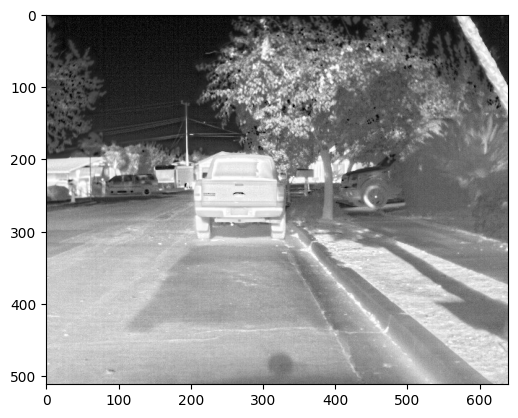

torch.Size([3, 32, 32])


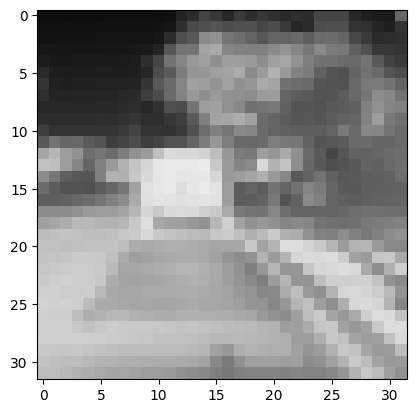

torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([1, 3, 128, 128])
(128, 128, 3)


AttributeError: 'AxesImage' object has no attribute 'convert'

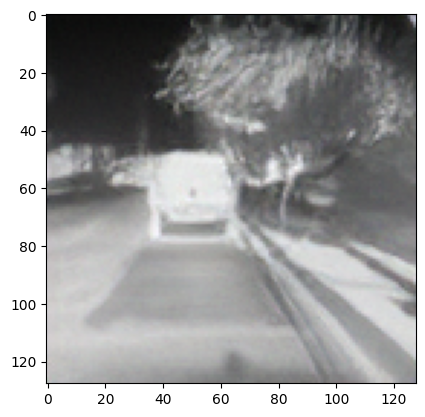

In [15]:
from PIL import Image
from torchvision import transforms
lr_img_path = r"C:\SaiVinay\Thesis\Dataset\FLIR Dataset\FLIR_ADAS_1_3\train\thermal_8_bit\FLIR_00001.jpeg"
lr_img = Image.open(lr_img_path).convert("RGB")
plt.imshow(lr_img)
plt.show()
#resize the image to 32x32
pre_process_lr = transforms.Compose([transforms.Resize(32),
                                     transforms.RandomCrop(32),
                                    transforms.ToTensor()])

lr_img = pre_process_lr(lr_img)
# lr_img = lr_img.permute(1, 2, 0)
print(lr_img.shape)

# show the image
import matplotlib.pyplot as plt
lr_img = lr_img.permute(1, 2, 0)
plt.imshow(lr_img)
plt.show()

import torch
with torch.no_grad():
    print(lr_img.shape)
    lr_img = lr_img.permute(2, 0, 1)
    print(lr_img.shape)
    sr_img = netG(lr_img.unsqueeze(0)) # c, h, w
    print(sr_img.shape)
    sr_img = sr_img.squeeze(0).permute(1, 2, 0).clamp(0, 1).numpy()
    print(sr_img.shape)
    plt.imshow(sr_img)
    plt.show()

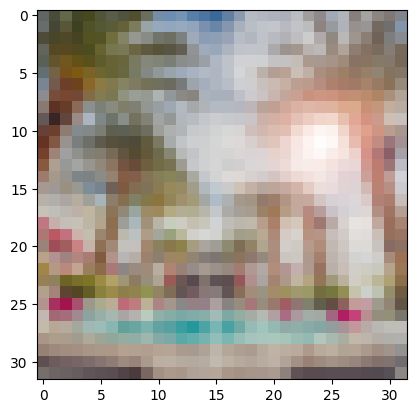

In [13]:
# show the image
import matplotlib.pyplot as plt
lr_img = lr_img.permute(1, 2, 0)
plt.imshow(lr_img)
plt.show()

torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([1, 3, 128, 128])
(128, 128, 3)


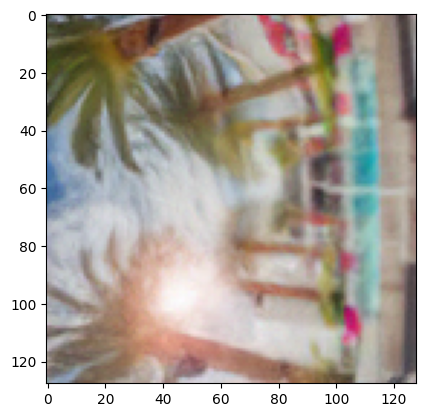

In [14]:
# pass the image to netG and show the resulting output image
import torch
with torch.no_grad():
    print(lr_img.shape)
    lr_img = lr_img.permute(2,0,1)
    print(lr_img.shape)
    sr_img = netG(lr_img.unsqueeze(0)) # c, h, w
    print(sr_img.shape)
    sr_img = sr_img.squeeze(0).permute(1, 2, 0).clamp(0, 1).numpy()
    print(sr_img.shape)
    plt.imshow(sr_img)
    plt.show()

In [25]:
from create_dataset import ImageDataloader
HR_train = r"C:\SaiVinay\SproutsAI\GitHub_\ir_srgan_otsr\DF2K_LR_HR\imgsResizedHR"
LR_train = r"C:\SaiVinay\SproutsAI\GitHub_\ir_srgan_otsr\DF2K_LR_HR\imgsResizedLR"
dataset = ImageDataloader(HR_train, LR_train)
len(dataset[0][0])

3

In [26]:
dataset[0][0].shape

torch.Size([3, 128, 128])

In [4]:
from torch.utils.data import DataLoader
from create_dataset import ImageDataloader
HR_train = r"C:\SaiVinay\SproutsAI\GitHub_\ir_srgan_otsr\DF2K_LR_HR\imgsResizedHR_L2"
LR_train = r"C:\SaiVinay\SproutsAI\GitHub_\ir_srgan_otsr\DF2K_LR_HR\imgsResizedLR_L2"

dataset = ImageDataloader(HR_train, LR_train)
dataloader = DataLoader(dataset, batch_size=32,  num_workers=4)

torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 32, 32])


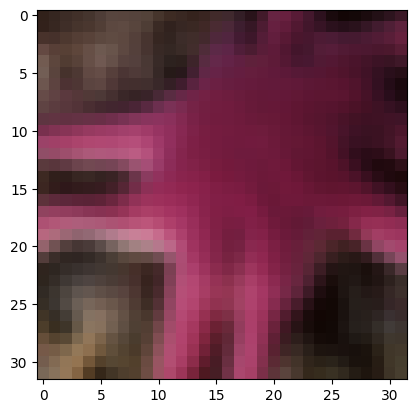

In [6]:
import matplotlib.pyplot as plt
for _, (hr, lr) in enumerate(dataloader):
    print(hr.shape)
    print(lr.shape)
    
    lr_img = lr[0].permute(1, 2, 0) #HWC
    plt.imshow(lr_img)
    plt.show()
    break

torch.Size([3, 32, 32])


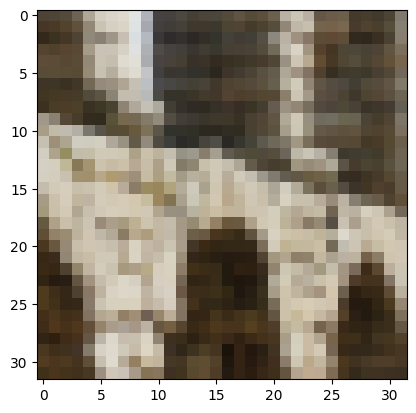

torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([1, 3, 128, 128])
(128, 128, 3)


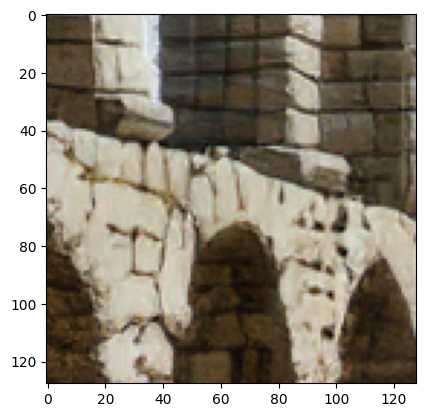

In [34]:
from PIL import Image
from torchvision import transforms
lr_img_path = r"C:\SaiVinay\SproutsAI\GitHub_\ir_srgan_otsr\DF2K_LR_HR\imgsResizedLR\0009.png"
lr_img = Image.open(lr_img_path).convert("RGB")
#resize the image to 32x32
pre_process_lr = transforms.Compose([#transforms.Resize(32),
                                     transforms.CenterCrop(32),
                                    transforms.ToTensor()])

lr_img = pre_process_lr(lr_img)
# lr_img = lr_img.permute(1, 2, 0)
print(lr_img.shape)

# show the image
import matplotlib.pyplot as plt
lr_img = lr_img.permute(1, 2, 0)
plt.imshow(lr_img)
plt.show()

import torch
with torch.no_grad():
    print(lr_img.shape)
    lr_img = lr_img.permute(2, 0, 1)
    print(lr_img.shape)
    sr_img = netG(lr_img.unsqueeze(0)) # c, h, w
    print(sr_img.shape)
    sr_img = sr_img.squeeze(0).permute(1, 2, 0).clamp(0, 1).numpy()
    print(sr_img.shape)
    plt.imshow(sr_img)
    plt.show()

### 16/03/2024

In [1]:
from create_dataset import ImageDataloader
HR_train = r"C:\SaiVinay\SproutsAI\GitHub_\ir_srgan_otsr\DF2K_LR_HR\imgsResizedLR"
LR_train = r"C:\SaiVinay\SproutsAI\GitHub_\ir_srgan_otsr\DF2K_LR_HR\imgsResizedLR"
dataset = ImageDataloader(HR_train)
len(dataset[0][0])

3

torch.Size([3, 128, 128])
torch.Size([3, 32, 32])


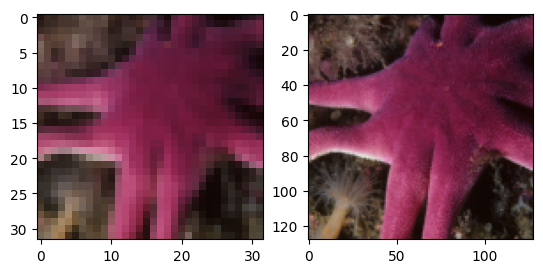

In [2]:
# show the image
import matplotlib.pyplot as plt
for _, (hr, lr) in enumerate(dataset):
    print(hr.shape)
    print(lr.shape)
    
    lr_img = lr.permute(1, 2, 0) #HWC
    hr_img = hr.permute(1, 2, 0) #HWC
    # plot the lr and hr image in a single plot
    fig, axis = plt.subplots(1,2)
    axis[0].imshow(lr_img)
    axis[0].set_label("LR Image")
    axis[1].imshow(hr_img)
    axis[1].set_label("HR Image")
    plt.show()
    break



In [7]:
dataset[0][0].shape

torch.Size([3, 128, 128])

In [15]:
import wandb


In [21]:
import datetime

curr_time = datetime.datetime.now().strftime("%d-%m_%H-%M")
today = datetime.date.today()
print(curr_time)
print(f"{today.year}-{today.month}-{today.day}")

16-03_10-58
2024-3-16
